# 2021/12/13
# 本代码绘制bob爆发日期和计算的越赤道气流指数的相关关系

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import sys
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

sys.path.append("/home/sun/mycode/module/")
from module_sun import *

/tmp/ipykernel_238939/932999558.py:23: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a  =  np.zeros(40,dtype=int).astype(dtype=np.str) ; a[:]  =  'grey'


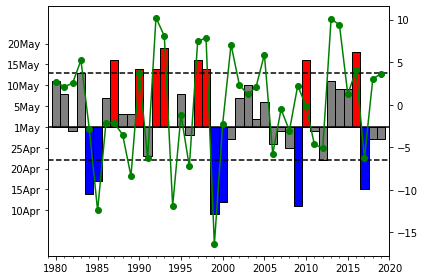

In [38]:
path  =  "/home/sun/qomo-data/"
lonslice1  =  slice(75,85)
lonslice2  =  slice(50,60)

f1  =  xr.open_dataset(path+"april_wind_early-late-climate_year.nc").sel(lon=lonslice1,lat=slice(-5,5),lev=925)
f2  =  xr.open_dataset(path+"april_wind_early-late-climate_year.nc").sel(lon=lonslice2,lat=slice(-5,5),lev=925)

index_89  =  np.average(np.average(f1.climate_v,axis=1),axis=1)
index_56  =  np.average(np.average(f2.climate_v,axis=1),axis=1)

with open("/home/sun/data/onsetdate.json",'r') as load_f:
    a = json.load(load_f)

year = np.array(list(a.keys()))    ;  year  =  year.astype(int)
day  = np.array(list(a.values()))  ;  day   =  day.astype(int)

import pandas as pd

data = pd.DataFrame({'A':day,'B':index_56,'C':index_89})


# 筛选 晚年用红色，早年用蓝色
a  =  np.zeros(40,dtype=int).astype(dtype=np.str) ; a[:]  =  'grey'
color_list  =  a.tolist()#  ;  color_list[:]  =  'grey'

for i in range(0,40):
    if day[i] < np.mean(day) - np.std(day):
        color_list[i]  =  'blue'
    if day[i] > np.mean(day) + np.std(day):
        color_list[i]  =  'red'
        
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# 设置y轴
y_label  =  ['10Apr','15Apr','20Apr','25Apr','1May','5May','10May','15May','20May']

fig,axs  =  plt.subplots(tight_layout=True)

# axs.set_yticks(np.arange(90, 160,10))

axs.bar(year,day-120,width=1,color=color_list,edgecolor='black')
# 刻度设置
axs.set_xlim(1979,2020)
axs.xaxis.set_major_locator(MultipleLocator(5))
axs.xaxis.set_minor_locator(MultipleLocator(1))

axs.set_yticks(np.arange(-20,25,5))
axs.set_yticklabels(y_label)

axs.plot([1979,2020],[0,0],color='black')
axs.plot([1979,2020],[np.ceil(np.mean(day)-np.std(day))-120,np.ceil(np.mean(day)-np.std(day))-120],color='k',linestyle='dashed')
axs.plot([1979,2020],[np.floor(np.mean(day)+np.std(day))-120,np.floor(np.mean(day)+np.std(day))-120],color='k',linestyle='dashed')

axs.set_aspect(0.5)

ax2  =  axs.twinx()
ax2.plot(year,(index_89-np.mean(index_89))*-10,color='g',marker='o')

plt.tight_layout()
plt.savefig("/home/sun/paint/lunwen/april_index_bob_time_seris.pdf",dpi=1200)

/tmp/ipykernel_238939/845884891.py:23: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a  =  np.zeros(40,dtype=int).astype(dtype=np.str) ; a[:]  =  'grey'


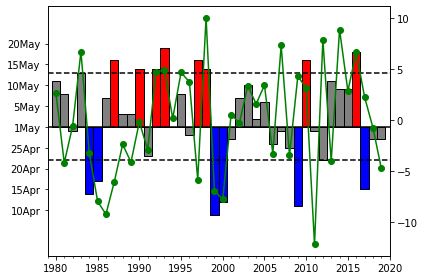

In [27]:
path  =  "/home/sun/qomo-data/"
lonslice1  =  slice(80,90)
lonslice2  =  slice(50,60)

f1  =  xr.open_dataset(path+"march_wind_early-late-climate_year.nc").sel(lon=lonslice1,lat=slice(-5,5),lev=925)
f2  =  xr.open_dataset(path+"march_wind_early-late-climate_year.nc").sel(lon=lonslice2,lat=slice(-5,5),lev=925)

index_89  =  np.average(np.average(f1.climate_v,axis=1),axis=1)
index_56  =  np.average(np.average(f2.climate_v,axis=1),axis=1)

with open("/home/sun/data/onsetdate.json",'r') as load_f:
    a = json.load(load_f)

year = np.array(list(a.keys()))    ;  year  =  year.astype(int)
day  = np.array(list(a.values()))  ;  day   =  day.astype(int)

import pandas as pd

data = pd.DataFrame({'A':day,'B':index_56,'C':index_89})


# 筛选 晚年用红色，早年用蓝色
a  =  np.zeros(40,dtype=int).astype(dtype=np.str) ; a[:]  =  'grey'
color_list  =  a.tolist()#  ;  color_list[:]  =  'grey'

for i in range(0,40):
    if day[i] < np.mean(day) - np.std(day):
        color_list[i]  =  'blue'
    if day[i] > np.mean(day) + np.std(day):
        color_list[i]  =  'red'
        
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# 设置y轴
y_label  =  ['10Apr','15Apr','20Apr','25Apr','1May','5May','10May','15May','20May']

fig,axs  =  plt.subplots(tight_layout=True)

# axs.set_yticks(np.arange(90, 160,10))

axs.bar(year,day-120,width=1,color=color_list,edgecolor='black')
# 刻度设置
axs.set_xlim(1979,2020)
axs.xaxis.set_major_locator(MultipleLocator(5))
axs.xaxis.set_minor_locator(MultipleLocator(1))

axs.set_yticks(np.arange(-20,25,5))
axs.set_yticklabels(y_label)

axs.plot([1979,2020],[0,0],color='black')
axs.plot([1979,2020],[np.ceil(np.mean(day)-np.std(day))-120,np.ceil(np.mean(day)-np.std(day))-120],color='k',linestyle='dashed')
axs.plot([1979,2020],[np.floor(np.mean(day)+np.std(day))-120,np.floor(np.mean(day)+np.std(day))-120],color='k',linestyle='dashed')

axs.set_aspect(0.5)

ax2  =  axs.twinx()
ax2.plot(year,(index_89-np.mean(index_89))*-10,color='g',marker='o')
#ax2.plot(year,(index_56-np.mean(index_56))*-10,color='y')

In [33]:
year[39]

2019

In [34]:
day[39]

117

In [35]:
out_date(2019,117)

'0427'